## Import Packages

- First, let's run the cell below to import packages and the last cell with [Helper Functions](#helper).
- Back from Helper Function
<a id='helper_back'></a>

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat

## Import Data

In [13]:
Mat = loadmat("Data.mat")
Data = Mat['Data']
Matpd = pd.Series(Mat)
dataframe = pd.DataFrame(Matpd.Data, columns=Matpd.Column_Names[0][0].tolist())
dataframe

(Pressure (MPa),)  (Saturated Density (g/cc),)  (Dry Density (g/cc),)  \
0                 40.0                         2.39                 2.2361   
1                 40.0                         2.32                 2.1227   
2                 40.0                         2.33                 2.1479   
3                 40.0                         2.53                 2.4664   
4                 40.0                         2.25                 2.0145   
..                 ...                          ...                    ...   
265                5.0                         2.42                 2.2568   
266                5.0                         2.38                 2.2240   
267                5.0                         2.38                 2.2065   
268                5.0                         2.38                 2.2104   
269                5.0                         2.50                 2.4431   

     (Porosity (Fraction),)  (Clay Content (Fraction),)  \
0                    0.1539                        0.00   
1                    0.1973                        0.00   
2                    0.1821                        0.00   
3                    0.0636                        0.00   
4                    0.2355                        0.10   
..                      ...                         ...   
265                  0.1632                        0.14   
266                  0.1560                        0.10   
267                  0.1735                        0.11   
268                  0.1696                        0.16   
269                  0.0569                        0.06   

     (Saturated Vp(40 MPa) (km/s),)  (Saturated Vs(40 MPa) (km/s),)  \
0                              4.81                            3.10   
1                              4.46                            2.85   
2                              4.66                            2.91   
3                              5.52                            3.60   
4                              3.68                            2.22   
..                              ...                             ...   
265                            4.32                            2.55   
266                            4.24                            2.51   
267                            4.23                            2.43   
268                            4.19                            2.42   
269                            4.94                            3.12   

     (Dry Vp(40 MPa) (km/s),)  (Dry Vs(40 MPa) (km/s),)  (Dry Vp (km/s),)  \
0                        4.75                      3.15              4.75   
1                        4.36                      2.89              4.36   
2                        4.55                      2.95              4.55   
3                        5.27                      3.56              5.27   
4                        3.65                      2.36              3.65   
..                        ...                       ...               ...   
265                      4.16                      2.71              3.28   
266                      4.11                      2.63              3.27   
267                      4.17                      2.61              3.40   
268                      4.11                      2.63              3.37   
269                      4.80                      3.21              4.56   

     (Dry Vs (km/s),)  (Saturated Vp (km/s),)  (Saturated Vs (km/s),)  
0                3.15                    4.81                    3.10  
1                2.89                    4.46                    2.85  
2                2.95                    4.66                    2.91  
3                3.56                    5.52                    3.60  
4                2.36                    3.68                    2.22  
..                ...                     ...                     ...  
265              2.24                    3.98                    2.28  
266  

## Problem-1

In [14]:
# Select the useful data
Data30Vp=[]; Data30Vs=[]; Data30Density=[]; Data30Porosity=[]; Data30Fraction=[]
Data40Vp=[]; Data40Vs=[]; Data40Density=[]; Data40Porosity=[]; Data40Fraction=[]
for i in range(0,np.size(Mat['Data'],0)):
    if Data[i,0]==30:
        Data30Vp.append(Data[i,5])
        Data30Vs.append(Data[i,6])
        Data30Density.append(Data[i,1])
        Data30Porosity.append(Data[i,3])
        Data30Fraction.append(Data[i,4])
    elif Data[i,0]==40:
        Data40Vp.append(Data[i,5])
        Data40Vs.append(Data[i,6])
        Data40Density.append(Data[i,1])
        Data40Porosity.append(Data[i,3])
        Data40Fraction.append(Data[i,4])

# Divide data into 2 parts: clean sandstone and shaley sandstone
CleanVp=[]; CleanVs=[]; CleanDensity=[]; CleanPorosity=[]; CleanFraction=[]
ShaleyVp=[]; ShaleyVs=[]; ShaleyDensity=[]; ShaleyPorosity=[]; ShaleyFraction=[]
for i in range(0, np.size(Data30Vp)):
    if Data30Fraction[i] < 0.2:
        CleanVp.append(Data30Vp[i])
        CleanVs.append(Data30Vs[i])
        CleanDensity.append(Data30Density[i])
        CleanPorosity.append(Data30Porosity[i])
        CleanFraction.append(Data30Fraction[i])
    else:
        ShaleyVp.append(Data30Vp[i])
        ShaleyVs.append(Data30Vs[i])
        ShaleyDensity.append(Data30Density[i])
        ShaleyPorosity.append(Data30Porosity[i])
        ShaleyFraction.append(Data30Fraction[i])
for i in range(0, np.size(Data40Vp)):
    if Data40Fraction[i] < 0.2:
        CleanVp.append(Data40Vp[i])
        CleanVs.append(Data40Vs[i])
        CleanDensity.append(Data40Density[i])
        CleanPorosity.append(Data40Porosity[i])
        CleanFraction.append(Data40Fraction[i])
    else:
        ShaleyVp.append(Data40Vp[i])
        ShaleyVs.append(Data40Vs[i])
        ShaleyDensity.append(Data40Density[i])
        ShaleyPorosity.append(Data40Porosity[i])
        ShaleyFraction.append(Data40Fraction[i])    
CleanVp = np.array(CleanVp)
CleanVs = np.array(CleanVs)
CleanDensity = np.array(CleanDensity)
CleanPorosity = np.array(CleanPorosity)
CleanFraction = np.array(CleanFraction)
ShaleyVp = np.array(ShaleyVp)
ShaleyVs = np.array(ShaleyVs) 
ShaleyDensity = np.array(ShaleyDensity)
ShaleyPorosity = np.array(ShaleyPorosity)
ShaleyFraction = np.array(ShaleyFraction) 

## Problem-2

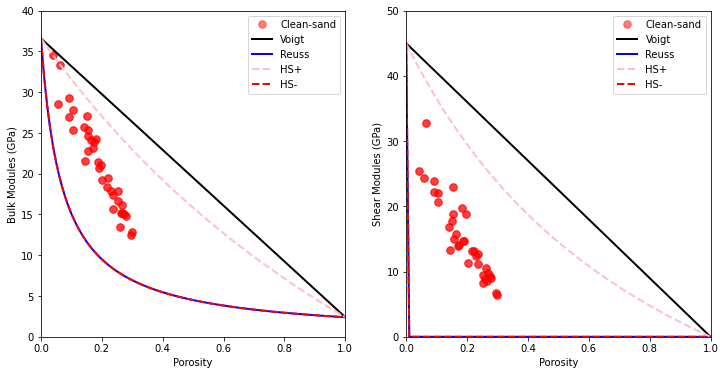

In [15]:
# Calculate bulk/shear modulus of clean sandstone
CleanBulkModule = CleanDensity * (np.power(CleanVp, 2) - 4/3 * np.power(CleanVs, 2))
CleanShearModule = CleanDensity * np.power(CleanVs, 2)

# Calculate Voigt-Reuss bounds and Hashin-Shtrikman for a mixture of quartz and water
Kw = 2.4
Uw = 0.0
Kqtz = 36.6
Uqtz =  45.0
Fw = np.linspace(0.0, 1.0, num=100)
Porosity = Fw / 1
Kvoigt = voigt_bound(Fw, Kw, Kqtz)
Uvoigt = voigt_bound(Fw, Uw, Uqtz)
Kreuss = reuss_bound(Fw, Kw, Kqtz)
Ureuss = reuss_bound(Fw, Uw, Uqtz)
K2HSu, K2HSl, U2HSu, U2HSl = hashin_shtrikman(Fw, Kw, Uw, Kqtz, Uqtz)

# Plot bulk modulus as a function of porosity
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].plot(CleanPorosity, CleanBulkModule, '.',markersize=15, color='red', alpha=0.5,label='Clean-sand')
axs[0].plot(Porosity, Kvoigt,linestyle='-', color='black',linewidth=2, alpha=1,label='Voigt')
axs[0].plot(Porosity, Kreuss,linestyle='-', color='Blue',linewidth=2, alpha=1,label='Reuss')
axs[0].plot(Porosity, K2HSu,linestyle='--', color='pink',linewidth=2, alpha=1,label='HS+')
axs[0].plot(Porosity, K2HSl,linestyle='--', color='red',linewidth=2, alpha=1,label='HS-')
axs[0].legend(loc='upper right',fontsize=10, shadow=False)
axs[0].set_xlim(0, 1)
axs[0].set_ylim(0, 40)
axs[0].set_xlabel('Porosity')
axs[0].set_ylabel('Bulk Modules (GPa)') 

# Plot shear modulus as a function of porosity
axs[1].plot(CleanPorosity, CleanShearModule, '.',markersize=15, color='red', alpha=0.5,label='Clean-sand')
axs[1].plot(Porosity, Uvoigt,linestyle='-', color='black',linewidth=2, alpha=1,label='Voigt')
axs[1].plot(Porosity, Ureuss,linestyle='-', color='Blue',linewidth=2, alpha=1,label='Reuss')
axs[1].plot(Porosity, U2HSu,linestyle='--', color='pink',linewidth=2, alpha=1,label='HS+')
axs[1].plot(Porosity, U2HSl,linestyle='--', color='red',linewidth=2, alpha=1,label='HS-')
axs[1].legend(loc='upper right',fontsize=10, shadow=False)
axs[1].set_xlim(0, 1)
axs[1].set_ylim(0, 50)
axs[1].set_xlabel('Porosity')
axs[1].set_ylabel('Shear Modules (GPa)')
fig.savefig('./p1-problem-2.pdf', dpi=800, format='pdf')

## Problem-3

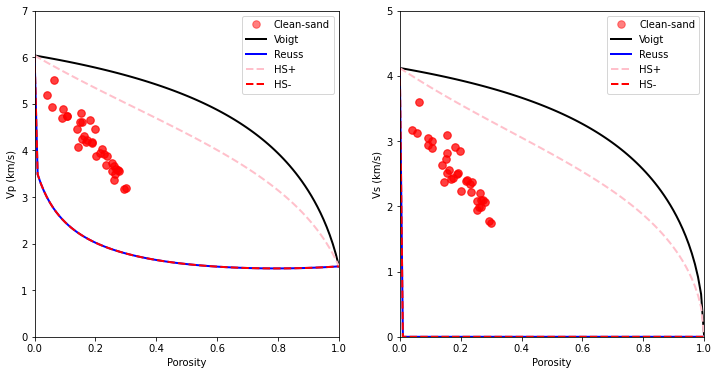

In [16]:
# Calculate Voigt-Reuss bounds and Hashin-Shtrikman for a mixture of quartz and water
Kw = 2.4
Uw = 0.0
DensityWater = 1.05
Kqtz = 36.6
Uqtz =  45.0
DensityQuartz = 2.65
Fw = np.linspace(0.000, 1, num=100)
Porosity = Fw / 1
DensityMix = Porosity*DensityWater + (1-Porosity)*DensityQuartz
Kvoigt = voigt_bound(Fw, Kw, Kqtz)
Uvoigt = voigt_bound(Fw, Uw, Uqtz)
Kreuss = reuss_bound(Fw, Kw, Kqtz)
Ureuss = reuss_bound(Fw, Uw, Uqtz)
K2HSu, K2HSl, U2HSu, U2HSl = hashin_shtrikman(Fw, Kw, Uw, Kqtz, Uqtz)

# Convert bulk/shear modulus to Vp and Vs
VPvoigt = np.power((Kvoigt+(4/3)*Uvoigt)/DensityMix, 1/2)
VPreuss = np.power((Kreuss+(4/3)*Ureuss)/DensityMix, 1/2)
VSvoigt = np.power(Uvoigt/DensityMix, 1/2)
VSreuss = np.power(Ureuss/DensityMix, 1/2)
VP2HSu = np.power((K2HSu+(4/3)*U2HSu)/DensityMix, 1/2)
VP2HSl = np.power((K2HSl+(4/3)*U2HSl)/DensityMix, 1/2)
VS2HSu = np.power(U2HSu/DensityMix, 1/2)
VS2HSl = np.power(U2HSl/DensityMix, 1/2)

# Plot Vp as a function of porosity
fig, axs = plt.subplots(1, 2,figsize=(12, 6))
axs[0].plot(CleanPorosity, CleanVp, '.',markersize=15, color='red', alpha=0.5,label='Clean-sand')
axs[0].plot(Porosity, VPvoigt,linestyle='-', color='black',linewidth=2, alpha=1,label='Voigt')
axs[0].plot(Porosity, VPreuss,linestyle='-', color='Blue',linewidth=2, alpha=1,label='Reuss')
axs[0].plot(Porosity, VP2HSu,linestyle='--', color='pink',linewidth=2, alpha=1,label='HS+')
axs[0].plot(Porosity, VP2HSl,linestyle='--', color='red',linewidth=2, alpha=1,label='HS-')
axs[0].legend(loc='upper right',fontsize=10, shadow=False)
axs[0].set_xlim(0, 1)
axs[0].set_ylim(0, 7)
axs[0].set_xlabel('Porosity')
axs[0].set_ylabel('Vp (km/s)') 

# Plot Vs as a function of porosity
axs[1].plot(CleanPorosity, CleanVs, '.',markersize=15, color='red', alpha=0.5,label='Clean-sand')
axs[1].plot(Porosity, VSvoigt,linestyle='-', color='black',linewidth=2, alpha=1,label='Voigt')
axs[1].plot(Porosity, VSreuss,linestyle='-', color='Blue',linewidth=2, alpha=1,label='Reuss')
axs[1].plot(Porosity, VS2HSu,linestyle='--', color='pink',linewidth=2, alpha=1,label='HS+')
axs[1].plot(Porosity, VS2HSl,linestyle='--', color='red',linewidth=2, alpha=1,label='HS-')
axs[1].legend(loc='upper right',fontsize=10, shadow=False)
axs[1].set_xlim(0, 1)
axs[1].set_ylim(0, 5)
axs[1].set_xlabel('Porosity')
axs[1].set_ylabel('Vs (km/s)')
fig.savefig('./p1-problem-3.pdf', dpi=800, format='pdf')

## Problem-4

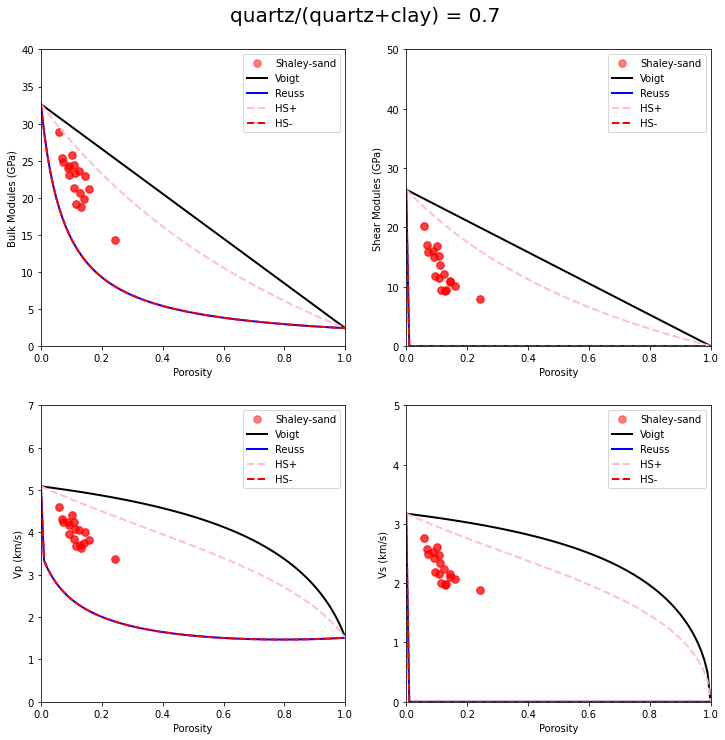

In [17]:
# Calculate bulk/shear modulus of shaley sandstone
ShaleyBulkModule = ShaleyDensity * (np.power(ShaleyVp, 2) - 4/3 * np.power(ShaleyVs, 2))
ShaleyShearModule = ShaleyDensity * np.power(ShaleyVs, 2)

# Calculate Voigt-Reuss bounds and Hashin-Shtrikman for a mixture of quartz, clay and water
ratio = 0.7  # quartz/(quartz+clay)
Kw = 2.4
Uw = 0.0
DensityWater = 1.05
Kqtz = 36.6
Uqtz = 45.0
DensityQuartz = 2.65
Kclay = 25.0
Uclay = 8.0
DensityClay = 2.55
Fw = np.linspace(0.0, 1.0, num=100)
Porosity = Fw / 1 
DensityMix = Porosity*DensityWater + (1-Porosity)*ratio*DensityQuartz + (1-Porosity)*(1-ratio)*DensityClay
KmixSolid = hill_average(np.array([ratio]), Kqtz, Kclay)[0]
UmixSolid = hill_average(np.array([ratio]), Uqtz, Uclay)[0]
Kvoigt = voigt_bound(Fw, Kw, KmixSolid)
Uvoigt = voigt_bound(Fw, Uw, UmixSolid)
Kreuss = reuss_bound(Fw, Kw, KmixSolid)
Ureuss = reuss_bound(Fw, Uw, UmixSolid)
K2HSu, K2HSl, U2HSu, U2HSl = hashin_shtrikman(Fw, Kw, Uw, KmixSolid, UmixSolid)

# Convert bulk/shear modulus to Vp and Vs
VPvoigt = np.power((Kvoigt+(4/3)*Uvoigt)/DensityMix, 1/2)
VPreuss = np.power((Kreuss+(4/3)*Ureuss)/DensityMix, 1/2)
VSvoigt = np.power(Uvoigt/DensityMix, 1/2)
VSreuss = np.power(Ureuss/DensityMix, 1/2)
VP2HSu = np.power((K2HSu+(4/3)*U2HSu)/DensityMix, 1/2)
VP2HSl = np.power((K2HSl+(4/3)*U2HSl)/DensityMix, 1/2)
VS2HSu = np.power(U2HSu/DensityMix, 1/2)
VS2HSl = np.power(U2HSl/DensityMix, 1/2)

# Plot the bulk modulus as a function of porosity
fig, axs = plt.subplots(2, 2, gridspec_kw=dict(height_ratios=[1, 1]),figsize=(12, 12))
axs[0,0].plot(ShaleyPorosity, ShaleyBulkModule, '.',markersize=15, color='red', alpha=0.5,label='Shaley-sand')
axs[0,0].plot(Porosity, Kvoigt,linestyle='-', color='black',linewidth=2, alpha=1,label='Voigt')
axs[0,0].plot(Porosity, Kreuss,linestyle='-', color='Blue',linewidth=2, alpha=1,label='Reuss')
axs[0,0].plot(Porosity, K2HSu,linestyle='--', color='pink',linewidth=2, alpha=1,label='HS+')
axs[0,0].plot(Porosity, K2HSl,linestyle='--', color='red',linewidth=2, alpha=1,label='HS-')
axs[0,0].legend(loc='upper right',fontsize=10, shadow=False)
axs[0,0].set_xlim(0, 1)
axs[0,0].set_ylim(0, 40)
axs[0,0].set_xlabel('Porosity')
axs[0,0].set_ylabel('Bulk Modules (GPa)') 

# Plot the shear modulus as a function of porosity
axs[0,1].plot(ShaleyPorosity, ShaleyShearModule, '.',markersize=15, color='red', alpha=0.5,label='Shaley-sand')
axs[0,1].plot(Porosity, Uvoigt,linestyle='-', color='black',linewidth=2, alpha=1,label='Voigt')
axs[0,1].plot(Porosity, Ureuss,linestyle='-', color='Blue',linewidth=2, alpha=1,label='Reuss')
axs[0,1].plot(Porosity, U2HSu,linestyle='--', color='pink',linewidth=2, alpha=1,label='HS+')
axs[0,1].plot(Porosity, U2HSl,linestyle='--', color='red',linewidth=2, alpha=1,label='HS-')
axs[0,1].legend(loc='upper right',fontsize=10, shadow=False)
axs[0,1].set_xlim(0, 1)
axs[0,1].set_ylim(0, 50)
axs[0,1].set_xlabel('Porosity')
axs[0,1].set_ylabel('Shear Modules (GPa)')

# Plot Vp as a function of porosity
axs[1,0].plot(ShaleyPorosity, ShaleyVp, '.',markersize=15, color='red', alpha=0.5,label='Shaley-sand')
axs[1,0].plot(Porosity, VPvoigt,linestyle='-', color='black',linewidth=2, alpha=1,label='Voigt')
axs[1,0].plot(Porosity, VPreuss,linestyle='-', color='Blue',linewidth=2, alpha=1,label='Reuss')
axs[1,0].plot(Porosity, VP2HSu,linestyle='--', color='pink',linewidth=2, alpha=1,label='HS+')
axs[1,0].plot(Porosity, VP2HSl,linestyle='--', color='red',linewidth=2, alpha=1,label='HS-')
axs[1,0].legend(loc='upper right',fontsize=10, shadow=False)
axs[1,0].set_xlim(0, 1)
axs[1,0].set_ylim(0, 7)
axs[1,0].set_xlabel('Porosity')
axs[1,0].set_ylabel('Vp (km/s)') 

# Plot Vs as a function of porosity
axs[1,1].plot(ShaleyPorosity, ShaleyVs, '.',markersize=15, color='red', alpha=0.5,label='Shaley-sand')
axs[1,1].plot(Porosity, VSvoigt,linestyle='-', color='black',linewidth=2, alpha=1,label='Voigt')
axs[1,1].plot(Porosity, VSreuss,linestyle='-', color='Blue',linewidth=2, alpha=1,label='Reuss')
axs[1,1].plot(Porosity, VS2HSu,linestyle='--', color='pink',linewidth=2, alpha=1,label='HS+')
axs[1,1].plot(Porosity, VS2HSl,linestyle='--', color='red',linewidth=2, alpha=1,label='HS-')
axs[1,1].legend(loc='upper right',fontsize=10, shadow=False)
axs[1,1].set_xlim(0, 1)
axs[1,1].set_ylim(0, 5)
axs[1,1].set_xlabel('Porosity')
axs[1,1].set_ylabel('Vs (km/s)')
fig.suptitle('quartz/(quartz+clay) = '+ str(ratio),fontsize=20, y=0.93)
fig.savefig('./p1-problem-4.pdf', dpi=800, format='pdf')


## Problem D

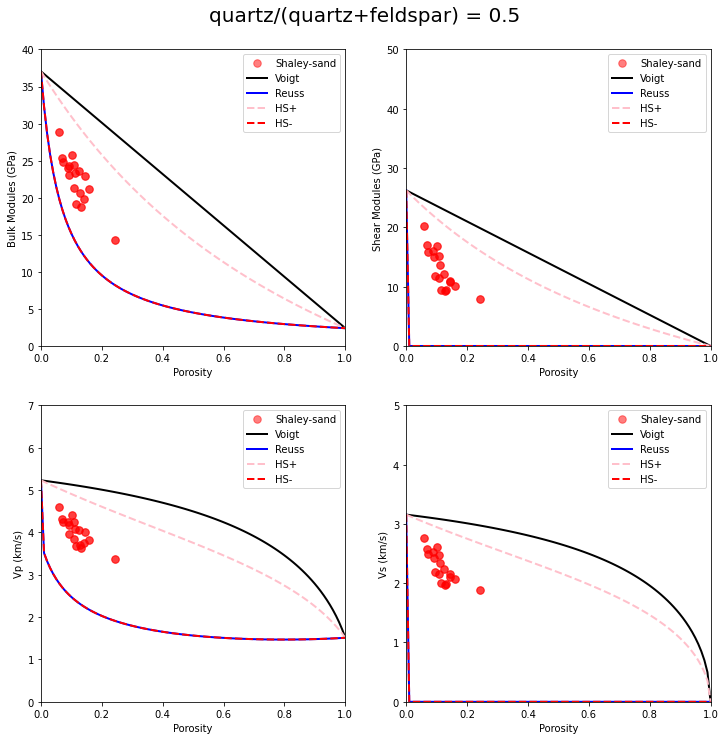

In [18]:
# Calculate bulk/shear modulus of shaley sandstone
ShaleyBulkModule = ShaleyDensity * (np.power(ShaleyVp, 2) - 4/3 * np.power(ShaleyVs, 2))
ShaleyShearModule = ShaleyDensity * np.power(ShaleyVs, 2)

# Calculate Voigt-Reuss bounds and Hashin-Shtrikman for a mixture of quartz, feldspar and water
ratio = 0.5  # quartz/(quartz+feldspar)
Kw = 2.4
Uw = 0.0
DensityWater = 1.05
Kqtz = 36.6
Uqtz = 45.0
DensityQuartz = 2.65
Kclay = 37.5  # instead of feldspar
Uclay = 15.0  # instead of feldspar
DensityClay = 2.62  # instead of feldspar
Fw = np.linspace(0.0, 1.0, num=100)
Porosity = Fw / 1 
DensityMix = Porosity*DensityWater + (1-Porosity)*ratio*DensityQuartz + (1-Porosity)*(1-ratio)*DensityClay
KmixSolid = hill_average(np.array([ratio]), Kqtz, Kclay)[0]
UmixSolid = hill_average(np.array([ratio]), Uqtz, Uclay)[0]
Kvoigt = voigt_bound(Fw, Kw, KmixSolid)
Uvoigt = voigt_bound(Fw, Uw, UmixSolid)
Kreuss = reuss_bound(Fw, Kw, KmixSolid)
Ureuss = reuss_bound(Fw, Uw, UmixSolid)
K2HSu, K2HSl, U2HSu, U2HSl = hashin_shtrikman(Fw, Kw, Uw, KmixSolid, UmixSolid)

# Convert bulk/shear modulus to Vp and Vs
VPvoigt = np.power((Kvoigt+(4/3)*Uvoigt)/DensityMix, 1/2)
VPreuss = np.power((Kreuss+(4/3)*Ureuss)/DensityMix, 1/2)
VSvoigt = np.power(Uvoigt/DensityMix, 1/2)
VSreuss = np.power(Ureuss/DensityMix, 1/2)
VP2HSu = np.power((K2HSu+(4/3)*U2HSu)/DensityMix, 1/2)
VP2HSl = np.power((K2HSl+(4/3)*U2HSl)/DensityMix, 1/2)
VS2HSu = np.power(U2HSu/DensityMix, 1/2)
VS2HSl = np.power(U2HSl/DensityMix, 1/2)

# Plot the bulk modulus as a function of porosity
fig, axs = plt.subplots(2, 2, gridspec_kw=dict(height_ratios=[1, 1]),figsize=(12, 12))
axs[0,0].plot(ShaleyPorosity, ShaleyBulkModule, '.',markersize=15, color='red', alpha=0.5,label='Shaley-sand')
axs[0,0].plot(Porosity, Kvoigt,linestyle='-', color='black',linewidth=2, alpha=1,label='Voigt')
axs[0,0].plot(Porosity, Kreuss,linestyle='-', color='Blue',linewidth=2, alpha=1,label='Reuss')
axs[0,0].plot(Porosity, K2HSu,linestyle='--', color='pink',linewidth=2, alpha=1,label='HS+')
axs[0,0].plot(Porosity, K2HSl,linestyle='--', color='red',linewidth=2, alpha=1,label='HS-')
axs[0,0].legend(loc='upper right',fontsize=10, shadow=False)
axs[0,0].set_xlim(0, 1)
axs[0,0].set_ylim(0, 40)
axs[0,0].set_xlabel('Porosity')
axs[0,0].set_ylabel('Bulk Modules (GPa)') 

# Plot the shear modulus as a function of porosity
axs[0,1].plot(ShaleyPorosity, ShaleyShearModule, '.',markersize=15, color='red', alpha=0.5,label='Shaley-sand')
axs[0,1].plot(Porosity, Uvoigt,linestyle='-', color='black',linewidth=2, alpha=1,label='Voigt')
axs[0,1].plot(Porosity, Ureuss,linestyle='-', color='Blue',linewidth=2, alpha=1,label='Reuss')
axs[0,1].plot(Porosity, U2HSu,linestyle='--', color='pink',linewidth=2, alpha=1,label='HS+')
axs[0,1].plot(Porosity, U2HSl,linestyle='--', color='red',linewidth=2, alpha=1,label='HS-')
axs[0,1].legend(loc='upper right',fontsize=10, shadow=False)
axs[0,1].set_xlim(0, 1)
axs[0,1].set_ylim(0, 50)
axs[0,1].set_xlabel('Porosity')
axs[0,1].set_ylabel('Shear Modules (GPa)')

# Plot Vp as a function of porosity
axs[1,0].plot(ShaleyPorosity, ShaleyVp, '.',markersize=15, color='red', alpha=0.5,label='Shaley-sand')
axs[1,0].plot(Porosity, VPvoigt,linestyle='-', color='black',linewidth=2, alpha=1,label='Voigt')
axs[1,0].plot(Porosity, VPreuss,linestyle='-', color='Blue',linewidth=2, alpha=1,label='Reuss')
axs[1,0].plot(Porosity, VP2HSu,linestyle='--', color='pink',linewidth=2, alpha=1,label='HS+')
axs[1,0].plot(Porosity, VP2HSl,linestyle='--', color='red',linewidth=2, alpha=1,label='HS-')
axs[1,0].legend(loc='upper right',fontsize=10, shadow=False)
axs[1,0].set_xlim(0, 1)
axs[1,0].set_ylim(0, 7)
axs[1,0].set_xlabel('Porosity')
axs[1,0].set_ylabel('Vp (km/s)') 

# Plot Vs as a function of porosity
axs[1,1].plot(ShaleyPorosity, ShaleyVs, '.',markersize=15, color='red', alpha=0.5,label='Shaley-sand')
axs[1,1].plot(Porosity, VSvoigt,linestyle='-', color='black',linewidth=2, alpha=1,label='Voigt')
axs[1,1].plot(Porosity, VSreuss,linestyle='-', color='Blue',linewidth=2, alpha=1,label='Reuss')
axs[1,1].plot(Porosity, VS2HSu,linestyle='--', color='pink',linewidth=2, alpha=1,label='HS+')
axs[1,1].plot(Porosity, VS2HSl,linestyle='--', color='red',linewidth=2, alpha=1,label='HS-')
axs[1,1].legend(loc='upper right',fontsize=10, shadow=False)
axs[1,1].set_xlim(0, 1)
axs[1,1].set_ylim(0, 5)
axs[1,1].set_xlabel('Porosity')
axs[1,1].set_ylabel('Vs (km/s)')
fig.suptitle('quartz/(quartz+feldspar) = '+ str(ratio),fontsize=20, y=0.93)
fig.savefig('./p1-problem-d.pdf', dpi=800, format='pdf')


## Helper Functions
<a id='helper'></a>

In [19]:
def voigt_bound(F1, k1, k2):
    """
    The upper bound for a mixture of two constituents.
    
    Args:
        F1: array of N volume fractions of first minerals (array, between 0 and 1).
        k1: elastic modulus of first minerals (float or int).
        k2: elastic modulus of second minerals (float or int).
    Returns:
        Kvoigt: Voigt upper bound (array).
    """
    num = len(F1)
    F2 = 1 - F1
    K1 = k1 * np.ones(num)
    K2 = k2 * np.ones(num)
    Kvoigt = F1 * K1 + F2 * K2

    return Kvoigt


def reuss_bound(F1, k1, k2):
    """
    The lower bound for a mixture of two constituents.
    
    Args:
        F1: array of N volume fractions of first minerals (array, between 0 and 1).
        k1: elastic modulus of first minerals (float or int).
        k2: elastic modulus of second minerals (float or int).
    Returns:
        Kreuss: Reuss lower bound (array).
    """
    num = len(F1)
    F2 = 1 - F1
    K1 = k1*np.ones(num)
    K2 = k2*np.ones(num)
    if k1 != 0:
        Kreuss = 1.0 / (F1/K1+F2/K2)
    else:
        Kreuss = 0*np.ones(num) 
    index = np.where(F1==0)
    Kreuss[index] = 1.0 / (F2[index]/k2)
    
    return Kreuss


def hill_average(F1, k1, k2):
    """
    Voigt-Reuss-Hill bounds for a mixture of two constituents.
     
    Args:
        F1: array of N volume fractions of first minerals (array, between 0 and 1).
        k1: elastic modulus of first minerals (float or int).
        k2: elastic modulus of second minerals (float or int).
    Returns:
        Khill: Hill bound (array).
    """
    Kvoigt = voigt_bound(F1, k1, k2)
    Kreuss = reuss_bound(F1, k1, k2)
    Khill = (Kvoigt + Kreuss) / 2.0
    
    return Khill


def hashin_shtrikman(F1, k1, u1, k2, u2):
    """
    Hashin-Shtrikman bounds for a mixture of two constituents.
    
    Args:
        F1: array of N volume fractions of first minerals (array, between 0 and 1).
        k1: bulk modulus of first minerals (float or int).
        u1: shear modulus of first minerals (float or int).
        k2: bulk modulus of second minerals (float or int).
        u2: shear modulus of second minerals (float or int).
    Returns:
        Khill: Hashin-Shtrikman bound (4*array).
    """
    c=4/3;
    F2 = 1-F1
    kmx=max(k1,k2)
    kmn=min(k1,k2)
    umx=max(u1,u2)
    umn=min(u1,u2)
    
    Ku = []; Kl = [];
    Uu = []; Ul = [];
    for i in range(0,len(F1)):
        F = np.array([F1[i], F2[i]])
        K = np.array([k1, k2])
        U = np.array([u1, u2])
        Kupper=1/np.sum(F/(K+c*umx))-c*umx     # HS K upper bound
        Klow=1/np.sum(F/(K+c*umn))-c*umn       # HS K lower bound
        etamx=umx*(9*kmx+8*umx)/(kmx+2*umx)/6
        etamn=umn*(9*kmn+8*umn)/(kmn+2*umn)/6
        Uupper=1/np.sum(F/(U+etamx))-etamx     # HS U upper bound
        if min(U) != 0:
            Ulow=1/np.sum(F/(U+etamn))-etamn   # HS U lower bound        
        else:
            Ulow=0
        if F1[i]==0:
            Ulow=1/np.sum(F2[i]/(u2+etamn))-etamn            
        Ku.append(Kupper); Kl.append(Klow); 
        Uu.append(Uupper); Ul.append(Ulow); 
                      
    return np.array(Ku), np.array(Kl), np.array(Uu), np.array(Ul)

-[Turn back!](#helper_back)